First, solve the system of ODEs for SIR.

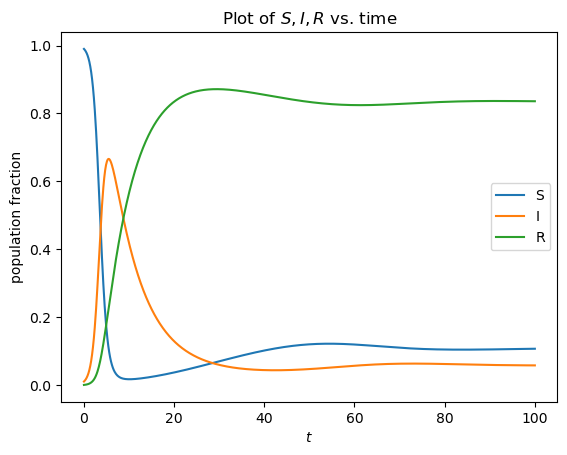

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

#time points to solve at
tpts = np.linspace(0,100,1001)

#initial values as population fractions
I0 = 1e-2
R0 = 0

# parameter values
params = {}
params['beta'] = 1.4247
params['gamma'] = 0.14286
params['mu'] = 0.01


##################################

# vectorize initial conditions
x0 = np.array([1-I0-R0, I0, R0])

# define ode equations
def SIR_ODEs(t,x,params):
    '''This function returns the time derivates of S,I,R.

    The ode solver expects the first two arguments to be t and x
    NOTE: This is the OPPPOSITE order from scipy.integrate.odeint!!

    The params argument should be a dict with beta, gamma, and mu as keys.
    It must be passed into the solver using the set_f_params method
    '''

    S = x[0]; I = x[1]; R = x[2]
    dx = np.zeros(3)

    dx[0] = -params['beta']*S*I + params['mu']*(I+R)
    dx[1] = params['beta']*S*I - params['gamma']*I - params['mu']*I
    dx[2] = params['gamma']*I - params['mu']*R

    return dx

##### Solve procedure #####
sol = solve_ivp(SIR_ODEs, t_span=[tpts[0], tpts[-1]], y0=x0, t_eval=tpts, 
                args=(params,))

S = sol.y[0,:]
I = sol.y[1,:]
R = sol.y[2,:]

plt.plot(sol.t,sol.y[0,:],sol.t,sol.y[1,:],sol.t,sol.y[2,:])
plt.legend(['S','I','R'])
plt.title("Plot of $S,I,R$ vs. time")
plt.xlabel("$t$")
plt.ylabel("population fraction")
plt.show()

Add noise to the solution at certain times to create data.

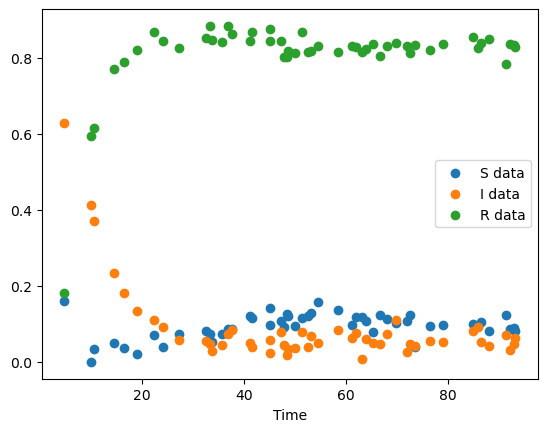

In [2]:
from numpy.random import default_rng
rng = default_rng()

N_data_pts = 50
data_time_idx = rng.integers(0,1000,N_data_pts) #random indices into tpts
data_times = tpts[data_time_idx]

# Gaussian noise clipped at zero
std = 0.02
S_data = S[data_time_idx] + rng.normal(0, std, N_data_pts)
S_data[S_data<0] = 0
I_data = I[data_time_idx] + rng.normal(0, std, N_data_pts)
I_data[I_data<0] = 0
R_data = R[data_time_idx] + rng.normal(0, std, N_data_pts)
R_data[R_data<0] = 0

plt.scatter(data_times, S_data, label='S data')
plt.scatter(data_times, I_data, label='I data')
plt.scatter(data_times, R_data, label='R data')
plt.xlabel('Time')
plt.legend()
plt.show()

Save the data.

In [8]:
data = np.array([data_time_idx, S_data, I_data, R_data]).T # rows = time indices, columns = time, S, I, R. Not in chronological order!
np.save('SIR_data.npy', data)

<class 'numpy.ndarray'>
[ 4.8 10.  10.7 14.6 16.4 19.  22.4 24.1 27.3 32.5 33.3 33.8 35.7 36.8
 37.6 41.2 41.5 45.1 45.2 47.3 47.8 48.4 48.7 50.1 51.4 52.6 53.2 54.6
 58.5 61.1 61.9 63.2 63.9 65.3 66.6 68.1 69.9 71.9 72.6 73.5 76.4 79.1
 85.  85.9 86.5 88.  91.3 92.1 93.  93.2]
